In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm


In [634]:
df_top_7000_men = pd.read_csv("./output/data_7100_top_men_cleaned.csv", index_col="Rank")
df_top_7000_men.head()

,Mark,Competitor,DOB,Nat,Pos,Venue,Date,Age at race,Current age,Year of the race,TimeSec
Rank,,,,,,,,,,,
0,2:01:39,Eliud KIPCHOGE,1984-11-05,KEN,1,Berlin (GER),2018-09-16,33,36,2018,7299.0
1,2:01:41,Kenenisa BEKELE,1982-06-13,ETH,1,Berlin (GER),2019-09-29,37,38,2019,7301.0
2,2:02:37,Eliud KIPCHOGE,1984-11-05,KEN,1,London (GBR),2019-04-28,34,36,2019,7357.0
3,2:02:48,Birhanu LEGESE,1994-09-11,ETH,2,Berlin (GER),2019-09-29,25,26,2019,7368.0
4,2:02:55,Mosinet GEREMEW,1992-02-12,ETH,2,London (GBR),2019-04-28,27,28,2019,7375.0


In [635]:
marathon_men_best_time_per_year = df_top_7000_men[['Mark','Year of the race','TimeSec']].groupby(["Year of the race"],as_index=False).min()
marathon_men_best_time_per_year.head(10)

,Year of the race,Mark,TimeSec
0,1965,2:12:00,7920.0
1,1967,2:09:37,7777.0
2,1968,2:10:48,7848.0
3,1969,2:08:34,7714.0
4,1970,2:09:28,7768.0
5,1972,2:10:30,7830.0
6,1973,2:11:13,7873.0
7,1974,2:09:12,7752.0
8,1975,2:10:09,7809.0
9,1976,2:09:55,7795.0


In [636]:
marathon_men_best_time_per_year = marathon_men_best_time_per_year.iloc[5:]
marathon_men_best_time_per_year

,Year of the race,Mark,TimeSec
5,1972,2:10:30,7830.0
6,1973,2:11:13,7873.0
7,1974,2:09:12,7752.0
8,1975,2:10:09,7809.0
9,1976,2:09:55,7795.0
10,1977,2:11:57,7917.0
11,1978,2:09:06,7746.0
12,1979,2:09:27,7767.0
13,1980,2:09:01,7741.0
14,1981,2:08:18,7698.0


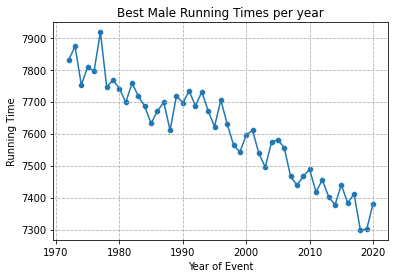

In [638]:
#Best Male Running Times per year / Mejor marca anual en categoria masculina.

sns.lineplot(data=marathon_men_best_time_per_year, x="Year of the race", y="TimeSec")
sns.scatterplot(data=marathon_men_best_time_per_year, x="Year of the race", y="TimeSec")

plt.title("Best Male Running Times per year")
plt.ylabel("Running Time")
plt.xlabel("Year of Event")
plt.plot();
plt.grid(linestyle="--");
plt.savefig("Best Male Running Times per year.png")

# Podemos observar como desde 1965 hasta 2020, las mejores marcas se han ido superando y en cerca de 50 años 
# se han bajado/superado en 8 minutos (480 segundos) las mejores marcas anuales.

In [84]:
df_top_7000_men_sorted = df_top_7000_men.sort_values(by="TimeSec",ascending=False)
df_top_7000_men_sorted

,Mark,Competitor,DOB,Nat,Pos,Venue,Date,Age at race,Current age,Year of the race,TimeSec
Rank,,,,,,,,,,,
7074,2:12:00,Felix KIMUTAI,1989-02-12,KEN,2,Istanbul (TUR),2020-11-08,31,31,2020,7920.0
7038,2:12:00,Wiesław PERSZKE,1960-02-18,POL,5,Berlin (GER),1991-09-29,31,60,1991,7920.0
7048,2:12:00,Erick WAINAINA,1973-12-19,KEN,1,Nagano (JPN),2003-04-20,29,46,2003,7920.0
7047,2:12:00,Andrew SAMBU,1972-10-05,TAN,2,Praha (CZE),2002-05-19,29,48,2002,7920.0
7046,2:12:00,David MORRIS,1970-05-17,USA,7,"Chicago, IL (USA)",2000-10-22,30,50,2000,7920.0
...,...,...,...,...,...,...,...,...,...,...,...
4,2:02:55,Mosinet GEREMEW,1992-02-12,ETH,2,London (GBR),2019-04-28,27,28,2019,7375.0
3,2:02:48,Birhanu LEGESE,1994-09-11,ETH,2,Berlin (GER),2019-09-29,25,26,2019,7368.0
2,2:02:37,Eliud KIPCHOGE,1984-11-05,KEN,1,London (GBR),2019-04-28,34,36,2019,7357.0


In [85]:
res=seasonal_decompose(df_top_7000_men_sorted.TimeSec,period=3476, model="additive") 
#period=27 ya que X debe tener 2 ciclos completos. Como hay 54 elementos, el periodo máximo es 27.

<Figure size 1080x504 with 0 Axes>

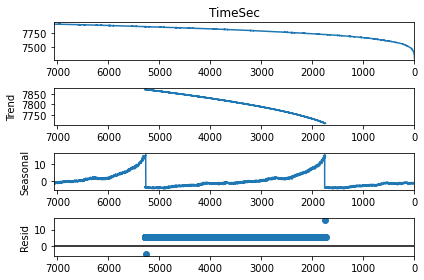

In [86]:
plt.figure(figsize=(15,7));
res.plot();

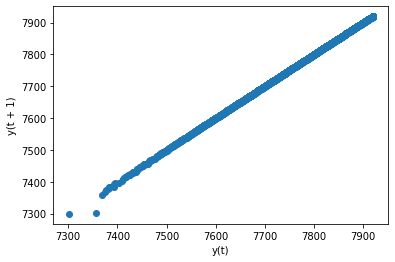

In [88]:
##Modelling the Data
##To model our data, we should look at a few assumptions. First, let's plot the lag_plot to detect 
# any autocorrelation. Do this for TimeSec.

pd.plotting.lag_plot(df_top_7000_men_sorted.TimeSec);
#Viendo la grafica, podemos ver como existe una correlacion positiva, ya que tiene una tendencia creciente, aunque no
# es una correlación excesivamente fuerte, ya que los puntos estan algo espaciados. Cabe destacar que la correlacion
# se vuelve un poco más debil en ambos extremos (inicio y fin), ya que los puntos estan más dispersos.

In [60]:
b=marathon_men_best_time_per_year
b.head()

,Year of the race,Mark,TimeSec
0,1965,2:12:00,7920.0
1,1967,2:09:37,7777.0
2,1968,2:10:48,7848.0
3,1969,2:08:34,7714.0
4,1970,2:09:28,7768.0


In [61]:
b = b.iloc[5:]
b.head()

,Year of the race,Mark,TimeSec
5,1972,2:10:30,7830.0
6,1973,2:11:13,7873.0
7,1974,2:09:12,7752.0
8,1975,2:10:09,7809.0
9,1976,2:09:55,7795.0


In [62]:
b.shape

(49, 3)

In [63]:
b["Year"] = pd.date_range(start=pd.datetime(1972, 1, 1), periods=49, freq='A')


<ipython-input-63-6a3f89828c56>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  b["Year"] = pd.date_range(start=pd.datetime(1972, 1, 1), periods=49, freq='A')
<ipython-input-63-6a3f89828c56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Year"] = pd.date_range(start=pd.datetime(1972, 1, 1), periods=49, freq='A')


In [64]:
b.index = b["Year"]
b.head()

,Year of the race,Mark,TimeSec,Year
Year,,,,
1972-12-31,1972,2:10:30,7830.0,1972-12-31
1973-12-31,1973,2:11:13,7873.0,1973-12-31
1974-12-31,1974,2:09:12,7752.0,1974-12-31
1975-12-31,1975,2:10:09,7809.0,1975-12-31
1976-12-31,1976,2:09:55,7795.0,1976-12-31


In [65]:
b

,Year of the race,Mark,TimeSec,Year
Year,,,,
1972-12-31,1972,2:10:30,7830.0,1972-12-31
1973-12-31,1973,2:11:13,7873.0,1973-12-31
1974-12-31,1974,2:09:12,7752.0,1974-12-31
1975-12-31,1975,2:10:09,7809.0,1975-12-31
1976-12-31,1976,2:09:55,7795.0,1976-12-31
1977-12-31,1977,2:11:57,7917.0,1977-12-31
1978-12-31,1978,2:09:06,7746.0,1978-12-31
1979-12-31,1979,2:09:27,7767.0,1979-12-31
1980-12-31,1980,2:09:01,7741.0,1980-12-31


In [67]:
res_b=seasonal_decompose(b.TimeSec,period=24, model="additive")
#period=27 ya que X debe tener 2 ciclos completos. Como hay 49 elementos, el periodo máximo es 24.

<Figure size 1080x504 with 0 Axes>

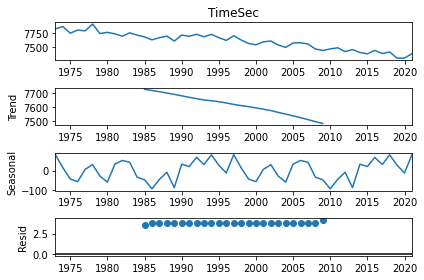

In [68]:
plt.figure(figsize=(15,7));
res_b.plot();

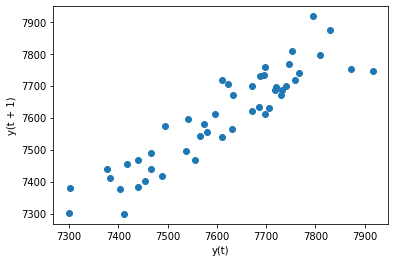

In [71]:
##Modelling the Data
##To model our data, we should look at a few assumptions. First, let's plot the lag_plot to detect 
# any autocorrelation. Do this for TimeSec.

pd.plotting.lag_plot(b.TimeSec);
#Viendo la grafica, podemos ver como existe una correlacion positiva, ya que tiene una tendencia creciente, aunque no
# es una correlación excesivamente fuerte, ya que los puntos estan algo espaciados. Cabe destacar que la correlacion
# se vuelve un poco más debil en ambos extremos (inicio y fin), ya que los puntos estan más dispersos.

In [72]:
# El siguiente paso es testear la estacionalidad, esto lo hacemos mediante el test Augmented Dickey Fuller.

aceleracion_fuller = adfuller(b.TimeSec)
p_value = aceleracion_fuller[1]
print(p_value)


0.9679486660480724


In [ ]:
# El valor p es un valor de probabilidad, por lo que oscila entre 0 y 1. 
# Un valor p mayor que alpha(0.05 por defecto) indica que no podemos rechazar la hipotesis nula. La data no es estacionaria.

# El valor p nos muestra la probabilidad de haber obtenido el resultado que hemos obtenido suponiendo que la 
# hipótesis nula H0 es cierta. Con el valor p obtenido cercano a 1, no podemos rechazar la hipótesis nula.

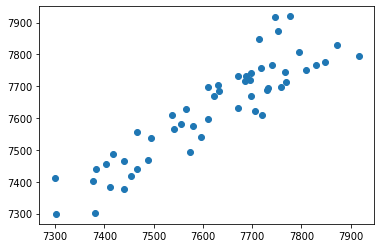

In [9]:
x = marathon_men_best_time_per_year.TimeSec.iloc[1:]
y = marathon_men_best_time_per_year.TimeSec.iloc[:-1]
plt.scatter(x,y)

In [10]:
lr = LinearRegression()
lr.fit(x.to_frame(),y);

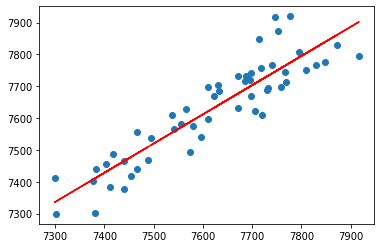

In [11]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x.to_frame()), c="r")

In [12]:
residuals = y-lr.predict(x.to_frame())


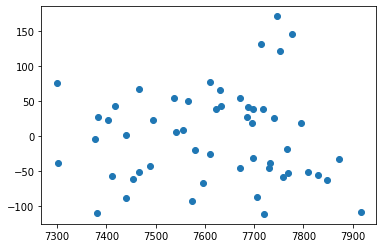

In [13]:
plt.scatter(x,residuals)

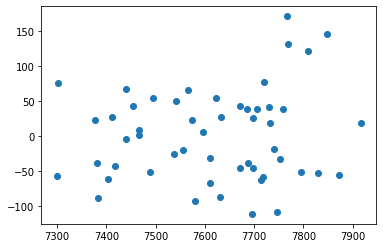

In [14]:
x = x.iloc[1:]
plt.scatter(x,residuals[:-1])

In [349]:
men_avg_age_per_year = df_top_7000_men[["Year of the race","Age at race"]].groupby(["Year of the race"],as_index=False).mean()
men_avg_age_per_year.head(10)

,Year of the race,Age at race
0,1965,24.00
1,1967,23.50
2,1968,27.00
3,1969,26.00
4,1970,27.25
5,1972,26.00
6,1973,31.00
7,1974,32.50
8,1975,27.75
9,1976,27.00


In [350]:
#eliminamos las primeras 5 filas ya que no existen registros en 1966 ni en 1971.

men_avg_age_per_year = men_avg_age_per_year.iloc[5:].reset_index(drop=True)
men_avg_age_per_year.head()

,Year of the race,Age at race
0,1972,26.00
1,1973,31.00
2,1974,32.50
3,1975,27.75
4,1976,27.00


In [585]:
def train_and_predict_average_age_model(dataset_name,model_name, column):
    
                     ##COMPARAR LA MEDIA DE EDADES DE LOS ULTIMOS 5 AÑOS EXISTENTES VS PREDICCION:
    first_year=dataset_name["Year of the race"][0]
    start_date=pd.to_datetime(first_year, format= "%Y")
    dataset_name["Year"] = pd.date_range(start=start_date, periods=dataset_name.shape[0], freq='A') # necesitamos crear un indice del dataset en funcion de los años de los que tenemos registros (desde 1972)
    dataset_name.index = dataset_name["Year"] 

    train = dataset_name.iloc[:-5] # todos excepto los ultimos 5 datos del dataset seran nuestro train.
    test = dataset_name.iloc[-5:] # los ultimos 5 datos del dataset seran nuestro test
    
    #IMPORTANTE, LA COLUMNA QUE QUEREMOS ENTRENAR Y PREDECIR DEBE SER SIEMPRE LA SEGUNDA COLUMNA DEL DATASET. LA PRIMERA SIEMPRE SERÁ "YEAR OF THE RACE".
    if model_name==AutoReg:
        model=model_name(train[column],lags=1) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    else:
        model=model_name(train[column],order=(2,0,1)) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    predictions = model.predict(len(dataset_name[column])-5, len(dataset_name[column])-1)
    print(pd.DataFrame({'observed':dataset_name[column][-5:], 'predicted':predictions}))
    
    rmse=sqrt(mean_squared_error(predictions,test[column]))
    print("RMSE: ",rmse)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    predictions.plot()
    plt.grid(linestyle="dotted");
                     ##PREDECIR LA MEDIA DE EDADES DE LOS PROXIMOS 5 AÑOS:
    
    future_predictions = model.predict(len(dataset_name[column]), len(dataset_name[column])+5)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    future_predictions.plot()
    plt.grid(linestyle="dotted");

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


             observed  predicted
2016-12-31  28.041667  28.405998
2017-12-31  27.997110  28.124514
2018-12-31  27.958791  27.826549
2019-12-31  28.575045  27.740986
2020-12-31  29.098361  27.850199
RMSE:  0.6957041249840864


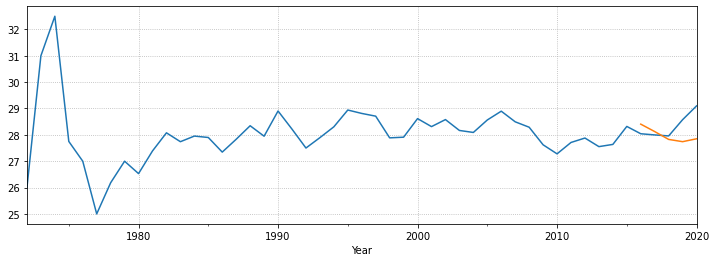

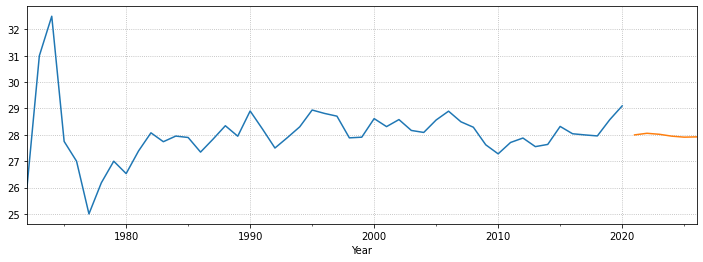

In [586]:
train_and_predict_average_age_model(men_avg_age_per_year, ARIMA, "Age at race")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


             observed  predicted
2016-12-31  28.041667  28.335887
2017-12-31  27.997110  28.269505
2018-12-31  27.958791  28.255862
2019-12-31  28.575045  28.208730
2020-12-31  29.098361  28.182973
RMSE:  0.4941937570698676


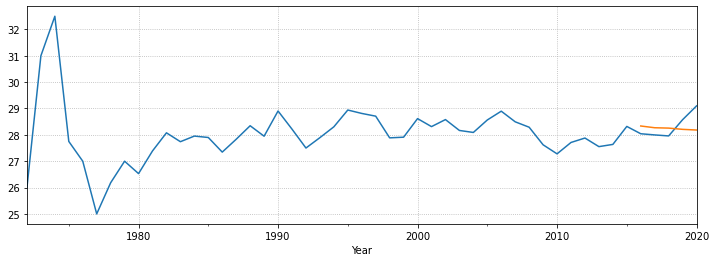

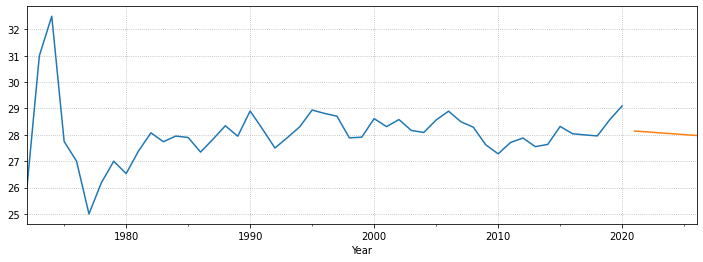

In [587]:
train_and_predict_average_age_model(men_avg_age_per_year, SARIMAX, "Age at race")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extend

             observed  predicted
2016-12-31  28.041667  28.185460
2017-12-31  27.997110  28.131845
2018-12-31  27.958791  28.110397
2019-12-31  28.575045  28.101817
2020-12-31  29.098361  28.098385
RMSE:  0.507091658076662


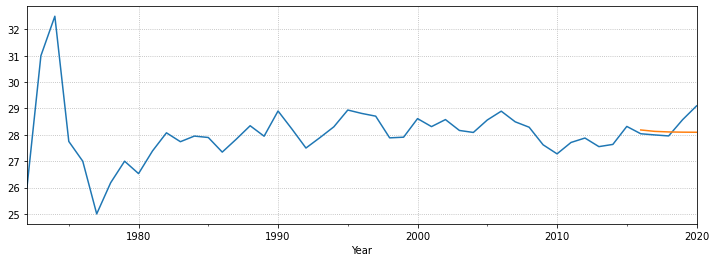

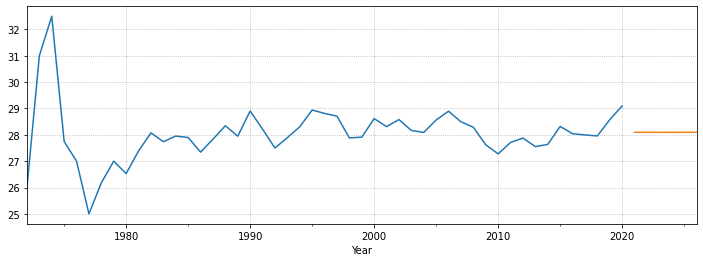

In [380]:
train_and_predict_average_age_model(men_avg_age_per_year, AutoReg, "Age at race")

In [254]:

men_best_time_per_year_kenia = df_top_7000_men[df_top_7000_men["Nat"]== "KEN"][["Year of the race","TimeSec"]].groupby(["Year of the race"],as_index=False).min()
men_best_time_per_year_kenia

,Year of the race,TimeSec
0,1982,7900.0
1,1983,7785.0
2,1984,7805.0
3,1985,7903.0
4,1986,7830.0
5,1987,7861.0
6,1988,7779.0
7,1989,7743.0
8,1990,7827.0
9,1992,7910.0


In [255]:
#El registro de 1991 no se encontraba entre los 7000 mejores, por lo que lo insertamos manualmente.
#2:14:26 = 8066 segundos.
men_best_time_per_year_kenia.loc[8.5] = "1991", 8066.0
men_best_time_per_year_kenia = men_best_time_per_year_kenia.sort_index().reset_index(drop=True)

In [256]:
men_best_time_per_year_kenia

,Year of the race,TimeSec
0,1982,7900.0
1,1983,7785.0
2,1984,7805.0
3,1985,7903.0
4,1986,7830.0
5,1987,7861.0
6,1988,7779.0
7,1989,7743.0
8,1990,7827.0
9,1991,8066.0


In [257]:
first_year = men_best_time_per_year_kenia["Year of the race"][0]
first_year

1982

In [263]:
periods=men_best_time_per_year_kenia.shape[0]
periods

39

In [744]:
def train_and_predict_best_time_per_country_model(dataset_name,model_name, column):
    
                     ##COMPARAR LOS MEJORES TIEMPOS DE LOS ULTIMOS 5 AÑOS EXISTENTES VS PREDICCION:
    first_year=dataset_name["Year of the race"][0]
    start_date=pd.to_datetime(first_year, format= "%Y")
    dataset_name["Year"] = pd.date_range(start=start_date, periods=dataset_name.shape[0], freq='A') # necesitamos crear un indice del dataset en funcion de los años de los que tenemos registros (desde 1972)
    dataset_name.index = dataset_name["Year"] 

    train = dataset_name.iloc[:-5] # todos excepto los ultimos 5 datos del dataset seran nuestro train.
    test = dataset_name.iloc[-5:] # los ultimos 5 datos del dataset seran nuestro test
    
    #IMPORTANTE, LA COLUMNA QUE QUEREMOS ENTRENAR Y PREDECIR DEBE SER SIEMPRE LA SEGUNDA COLUMNA DEL DATASET. LA PRIMERA SIEMPRE SERÁ "YEAR OF THE RACE".
    if model_name==AutoReg:
        model=model_name(train[column],lags=16) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    else:
        model=model_name(train[column],order=(2,0,1)) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    predictions = model.predict(len(dataset_name[column])-5, len(dataset_name[column])-1)
    print(pd.DataFrame({'observed':dataset_name[column][-5:], 'predicted':predictions}))
    
    rmse=sqrt(mean_squared_error(predictions,test[column]))
    print("RMSE: ",rmse)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    predictions.plot()
    plt.grid(linestyle="dotted");
    plt.title("Actuales mejores tiempos KENIA. Comparativa datos reales vs datos predichos por modelo");
    plt.ylabel('Tiempo en segs');
    plt.xlabel('Año');
    
                     ##PREDECIR MEJORES TIEMPOS DE LOS PROXIMOS 5 AÑOS:
    
    future_predictions = model.predict(len(dataset_name[column]), len(dataset_name[column])+5)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    future_predictions.plot()
    plt.grid(linestyle="dotted");
    plt.title("Predicción proximos mejores tiempos KENIA");
    plt.ylabel('Tiempo en segs');
    plt.xlabel('Año');

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning

            observed    predicted
2016-12-31    7385.0  7449.219670
2017-12-31    7412.0  7458.271389
2018-12-31    7299.0  7467.014162
2019-12-31    7357.0  7475.409487
2020-12-31    7380.0  7483.454197
RMSE:  108.82788582285329


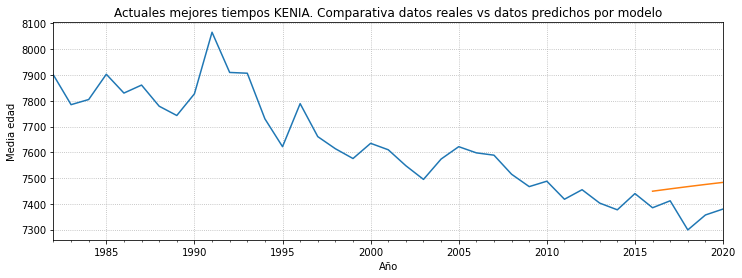

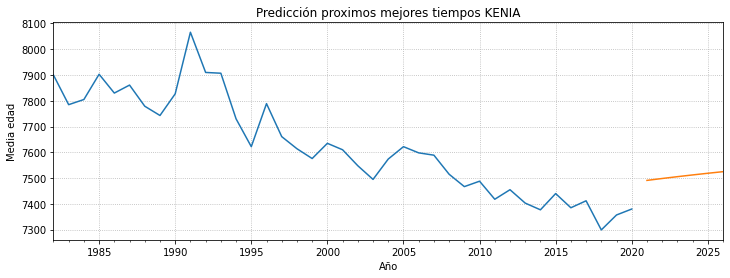

In [735]:
train_and_predict_best_time_per_country_model(men_best_time_per_year_kenia, ARIMA, "TimeSec")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


            observed    predicted
2016-12-31    7385.0  7434.121739
2017-12-31    7412.0  7431.901463
2018-12-31    7299.0  7430.999689
2019-12-31    7357.0  7430.573165
2020-12-31    7380.0  7430.317944
RMSE:  75.07041699610106


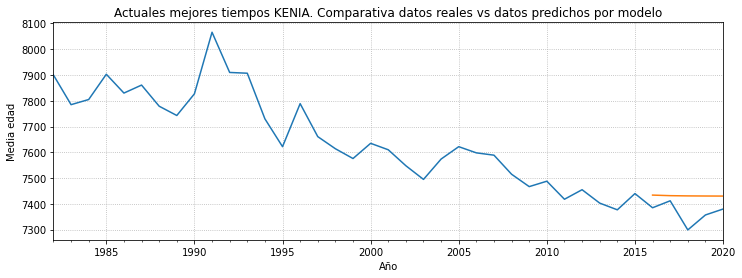

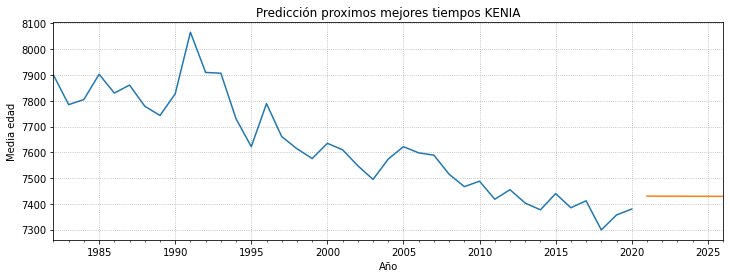

In [736]:
train_and_predict_best_time_per_country_model(men_best_time_per_year_kenia, SARIMAX, "TimeSec")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


            observed    predicted
2016-12-31    7385.0  7341.743604
2017-12-31    7412.0  7363.221610
2018-12-31    7299.0  7321.082629
2019-12-31    7357.0  7378.372734
2020-12-31    7380.0  7375.172967
RMSE:  32.30536679980861


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


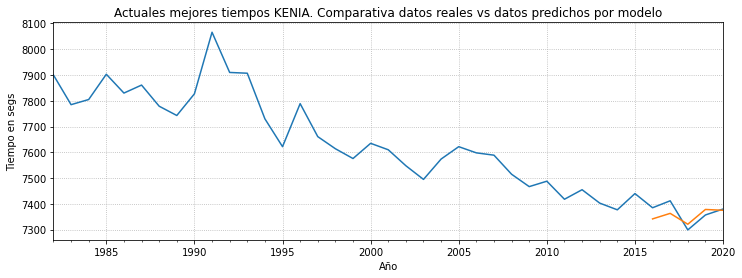

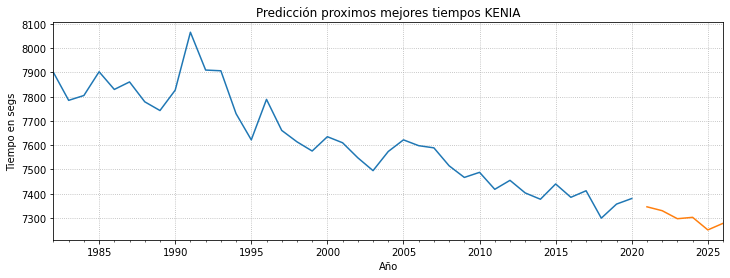

In [745]:
train_and_predict_best_time_per_country_model(men_best_time_per_year_kenia, AutoReg, "TimeSec")

In [313]:
# Creamos una tabla con los mejores tiempos de cada año de Etiopía
men_best_time_per_year_etiopia = df_top_7000_men[df_top_7000_men["Nat"]== "ETH"][["Year of the race","TimeSec"]].groupby(["Year of the race"],as_index=False).min()
men_best_time_per_year_etiopia

,Year of the race,TimeSec
0,1981,7871.0
1,1983,7803.0
2,1984,7832.0
3,1985,7745.0
4,1986,7709.0
5,1987,7869.0
6,1988,7610.0
7,1989,7719.0
8,1990,7892.0
9,1991,7808.0


In [314]:
#El registro de 1982 no se encontraba entre los 7000 mejores, por lo que lo insertamos manualmente.
#2:14:28 Tadesse BIRRU 1956 ETH 11 Tokyo (JPN)31 JAN 1982 = 8068 segundos.

men_best_time_per_year_etiopia.loc[0.5] = "1982", 8068.0
men_best_time_per_year_etiopia = men_best_time_per_year_etiopia.sort_index().reset_index(drop=True)

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


            observed    predicted
2016-12-31    7383.0  7516.836733
2017-12-31    7426.0  7526.724548
2018-12-31    7440.0  7533.056469
2019-12-31    7301.0  7539.599092
2020-12-31    7396.0  7545.792120
RMSE:  152.37087526299973


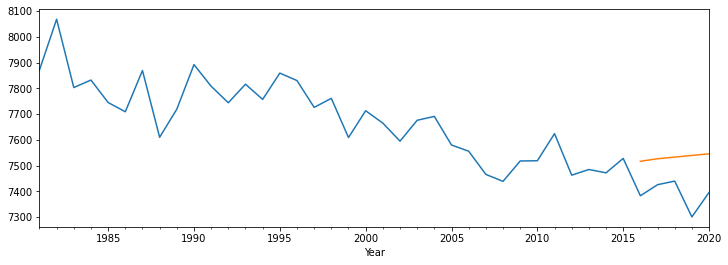

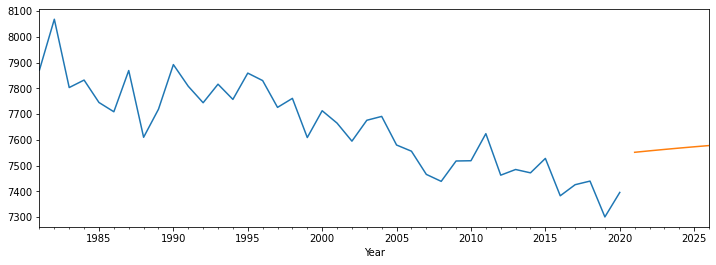

In [315]:
train_and_predict_best_time_per_country_model(men_best_time_per_year_etiopia, ARIMA, "TimeSec")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


            observed    predicted
2016-12-31    7383.0  7500.987588
2017-12-31    7426.0  7504.847153
2018-12-31    7440.0  7504.131447
2019-12-31    7301.0  7504.093805
2020-12-31    7396.0  7503.955676
RMSE:  124.2194096015292


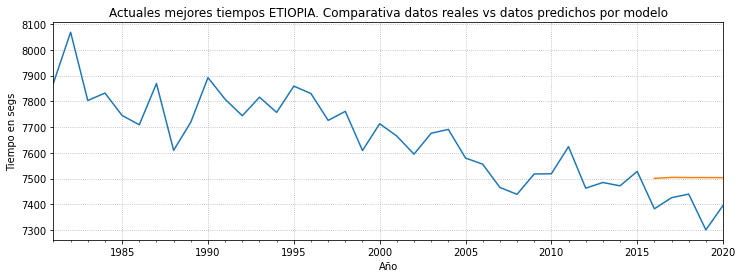

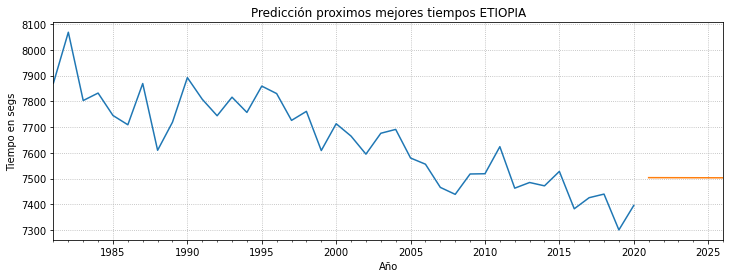

In [743]:
train_and_predict_best_time_per_country_model(men_best_time_per_year_etiopia, SARIMAX, "TimeSec")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extend

            observed    predicted
2016-12-31    7383.0  7603.718194
2017-12-31    7426.0  7787.055851
2018-12-31    7440.0  7861.626216
2019-12-31    7301.0  7890.663397
2020-12-31    7396.0  7914.398134
RMSE:  441.19974204895294


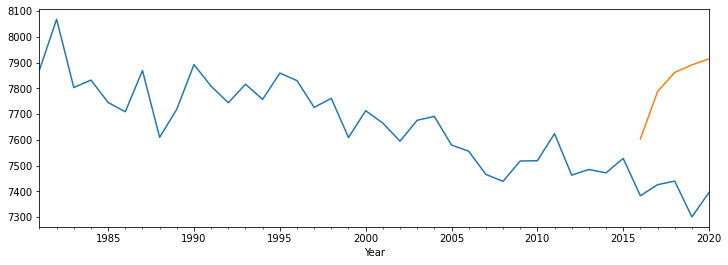

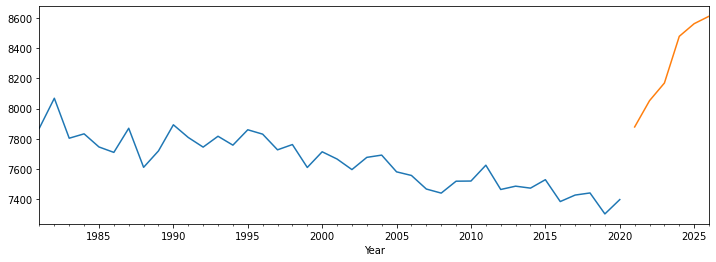

In [317]:
train_and_predict_best_time_per_country_model(men_best_time_per_year_etiopia, AutoReg, "TimeSec")

In [536]:
# Creamos una tabla con los mejores tiempos de cada año de JAPÓN
men_best_time_per_year_japan = df_top_7000_men[df_top_7000_men["Nat"]== "JPN"][["Year of the race","TimeSec"]].groupby(["Year of the race"],as_index=False).min()
men_best_time_per_year_japan.head(10)

,Year of the race,TimeSec
0,1965,7920.0
1,1967,7877.0
2,1970,7838.0
3,1978,7746.0
4,1979,7812.0
5,1980,7785.0
6,1981,7777.0
7,1982,7869.0
8,1983,7718.0
9,1984,7800.0


In [537]:
# Eliminamos las primeras 3 filas ya que solo existen 3 registros entre 1965 y 1978. Realizamos nuestro analisis
# desde 1978

men_best_time_per_year_japan = men_best_time_per_year_japan.iloc[3:].reset_index(drop=True)
men_best_time_per_year_japan.head()

,Year of the race,TimeSec
0,1978,7746.0
1,1979,7812.0
2,1980,7785.0
3,1981,7777.0
4,1982,7869.0


In [579]:
def japan(dataset_name,model_name, column):
    
                     ##COMPARAR LOS MEJORES TIEMPOS DE LOS ULTIMOS 5 AÑOS EXISTENTES VS PREDICCION:
    first_year=dataset_name["Year of the race"][0]
    start_date=pd.to_datetime(first_year, format= "%Y")
    dataset_name["Year"] = pd.date_range(start=start_date, periods=dataset_name.shape[0], freq='A') # necesitamos crear un indice del dataset en funcion de los años de los que tenemos registros (desde 1972)
    dataset_name.index = dataset_name["Year"] 

    train = dataset_name.iloc[:-5] # todos excepto los ultimos 5 datos del dataset seran nuestro train.
    test = dataset_name.iloc[-5:] # los ultimos 5 datos del dataset seran nuestro test
    
    #IMPORTANTE, LA COLUMNA QUE QUEREMOS ENTRENAR Y PREDECIR DEBE SER SIEMPRE LA SEGUNDA COLUMNA DEL DATASET. LA PRIMERA SIEMPRE SERÁ "YEAR OF THE RACE".
    if model_name==AutoReg:
        model=model_name(train[column],lags=12) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    else:
        model=model_name(train[column],order=(2,0,1)) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    predictions = model.predict(len(dataset_name[column])-5, len(dataset_name[column])-1)
    print(pd.DataFrame({'observed':dataset_name[column][-5:], 'predicted':predictions}))
    
    rmse=sqrt(mean_squared_error(predictions,test[column]))
    print("RMSE: ",rmse)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    predictions.plot()
    
                     ##PREDECIR MEJORES TIEMPOS DE LOS PROXIMOS 5 AÑOS:
    
    future_predictions = model.predict(len(dataset_name[column]), len(dataset_name[column])+5)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    future_predictions.plot()

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


            observed    predicted
2016-12-31    7741.0  7689.190264
2017-12-31    7639.0  7691.764203
2018-12-31    7550.0  7700.608832
2019-12-31    7670.0  7705.254798
2020-12-31    7529.0  7709.602068
RMSE:  111.36546849203081


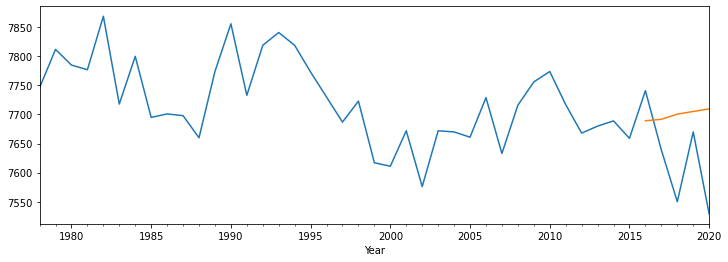

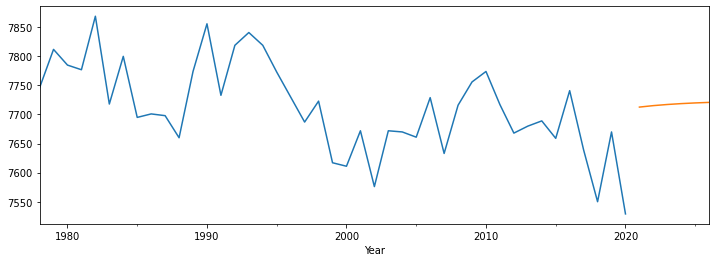

In [581]:
japan(men_best_time_per_year_japan, ARIMA, "TimeSec")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


            observed    predicted
2016-12-31    7741.0  7673.468598
2017-12-31    7639.0  7669.097032
2018-12-31    7550.0  7670.281791
2019-12-31    7670.0  7669.827885
2020-12-31    7529.0  7669.857253
RMSE:  89.1906118546923


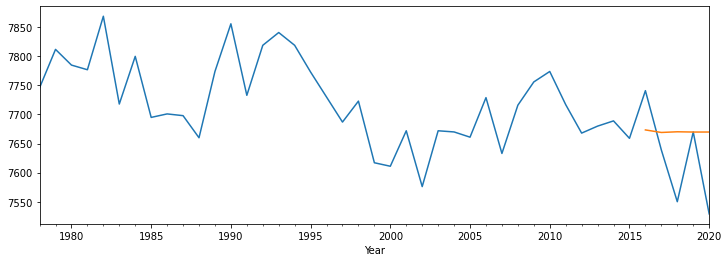

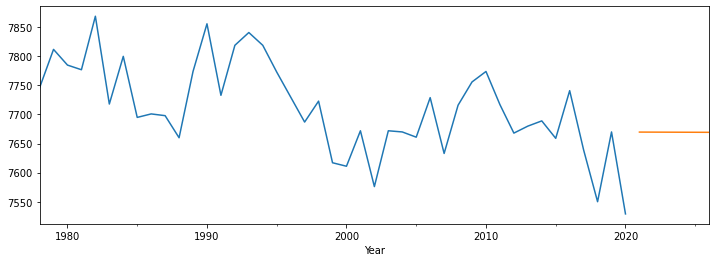

In [582]:
japan(men_best_time_per_year_japan, SARIMAX, "TimeSec")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


            observed    predicted
2016-12-31    7741.0  7638.377707
2017-12-31    7639.0  7647.709623
2018-12-31    7550.0  7650.315842
2019-12-31    7670.0  7658.510075
2020-12-31    7529.0  7663.032122
RMSE:  88.05349378111


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


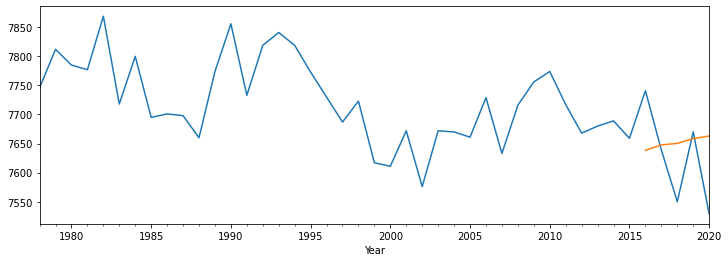

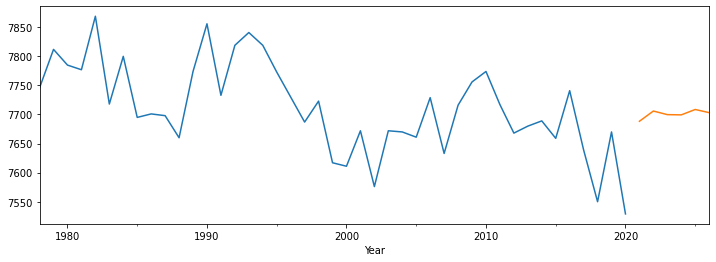

In [580]:
japan(men_best_time_per_year_japan, AutoReg, "TimeSec")

In [584]:
# Creamos una tabla con los mejores tiempos de cada año de MARRUECOS
men_best_time_per_year_mar = df_top_7000_men[df_top_7000_men["Nat"]== "MAR"][["Year of the race","TimeSec"]].groupby(["Year of the race"],as_index=False).min()
men_best_time_per_year_mar

,Year of the race,TimeSec
0,1987,7809.0
1,1991,7916.0
2,1993,7903.0
3,1994,7857.0
4,1995,7910.0
5,1996,7790.0
6,1997,7630.0
7,1998,7639.0
8,1999,7542.0
9,2000,7653.0


In [588]:
# Eliminamos las primeras 2 filas ya que solo existen 2 registros entre 1987 y 1992. Realizamos nuestro analisis
# desde 1993

men_best_time_per_year_mar = men_best_time_per_year_mar.iloc[2:].reset_index(drop=True)
men_best_time_per_year_mar.head()

,Year of the race,TimeSec
0,1993,7903.0
1,1994,7857.0
2,1995,7910.0
3,1996,7790.0
4,1997,7630.0


In [746]:
def mar(dataset_name,model_name, column):
    
                     ##COMPARAR LOS MEJORES TIEMPOS DE LOS ULTIMOS 5 AÑOS EXISTENTES VS PREDICCION:
    first_year=dataset_name["Year of the race"][0]
    start_date=pd.to_datetime(first_year, format= "%Y")
    dataset_name["Year"] = pd.date_range(start=start_date, periods=dataset_name.shape[0], freq='A') # necesitamos crear un indice del dataset en funcion de los años de los que tenemos registros (desde 1972)
    dataset_name.index = dataset_name["Year"] 

    train = dataset_name.iloc[:-5] # todos excepto los ultimos 5 datos del dataset seran nuestro train.
    test = dataset_name.iloc[-5:] # los ultimos 5 datos del dataset seran nuestro test
    
    #IMPORTANTE, LA COLUMNA QUE QUEREMOS ENTRENAR Y PREDECIR DEBE SER SIEMPRE LA SEGUNDA COLUMNA DEL DATASET. LA PRIMERA SIEMPRE SERÁ "YEAR OF THE RACE".
    if model_name==AutoReg:
        model=model_name(train[column],lags=4) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    else:
        model=model_name(train[column],order=(2,0,1)) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    predictions = model.predict(len(dataset_name[column])-5, len(dataset_name[column])-1)
    print(pd.DataFrame({'observed':dataset_name[column][-5:], 'predicted':predictions}))
    
    rmse=sqrt(mean_squared_error(predictions,test[column]))
    print("RMSE: ",rmse)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    predictions.plot()
    plt.grid(linestyle="dotted");
    plt.title("Actuales mejores tiempos MARRUECOS. Comparativa datos reales vs datos predichos por modelo");
    plt.ylabel('Tiempo en segs');
    plt.xlabel('Año');
    
                     ##PREDECIR MEJORES TIEMPOS DE LOS PROXIMOS 5 AÑOS:
    
    future_predictions = model.predict(len(dataset_name[column]), len(dataset_name[column])+5)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    future_predictions.plot()
    plt.grid(linestyle="dotted");
    plt.title("Predicción proximos mejores tiempos MARRUECOS");
    plt.ylabel('Tiempo en segs');
    plt.xlabel('Año');

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning

            observed    predicted
2016-12-31    7862.0  7788.089159
2017-12-31    7691.0  7771.167388
2018-12-31    7526.0  7757.511644
2019-12-31    7558.0  7748.388657
2020-12-31    7592.0  7740.891914
RMSE:  157.41912636677614


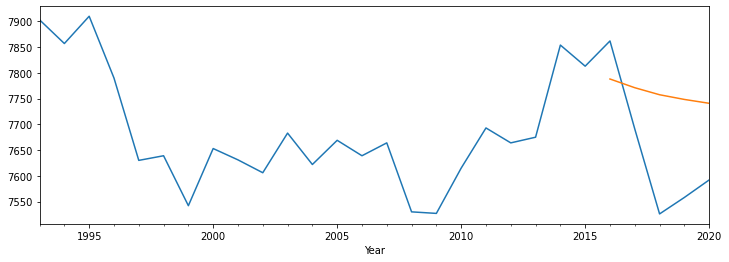

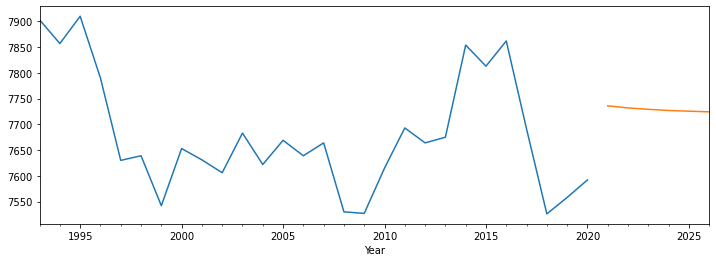

In [632]:
mar(men_best_time_per_year_mar, ARIMA, "TimeSec")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


            observed    predicted
2016-12-31    7862.0  7809.531119
2017-12-31    7691.0  7811.599758
2018-12-31    7526.0  7809.031893
2019-12-31    7558.0  7810.346210
2020-12-31    7592.0  7808.410035
RMSE:  203.91971479865012


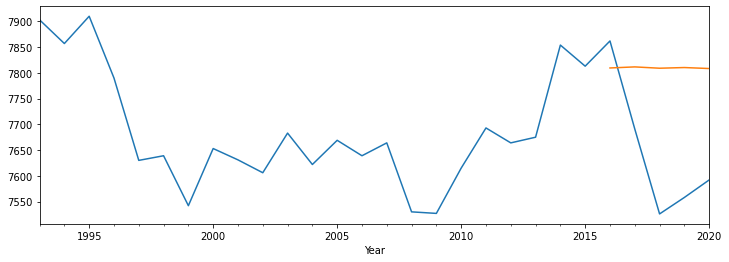

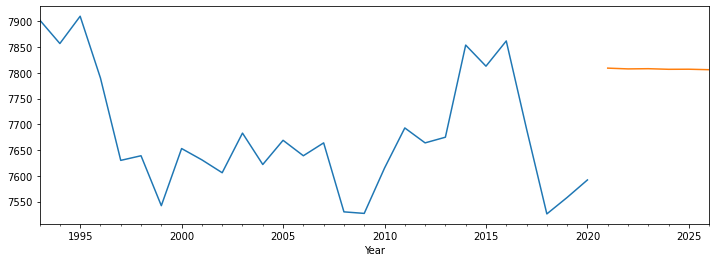

In [633]:
mar(men_best_time_per_year_mar, SARIMAX, "TimeSec")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


            observed    predicted
2016-12-31    7862.0  7727.666131
2017-12-31    7691.0  7687.002592
2018-12-31    7526.0  7631.816858
2019-12-31    7558.0  7612.623012
2020-12-31    7592.0  7621.831930
RMSE:  81.40318493642566


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


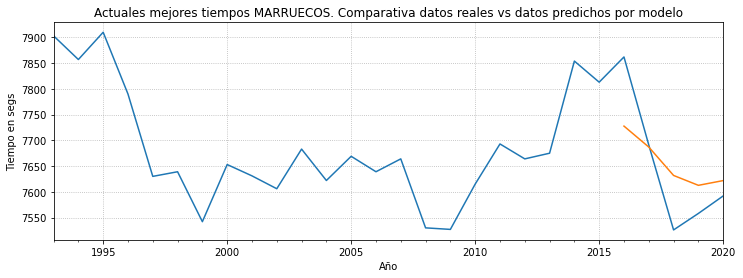

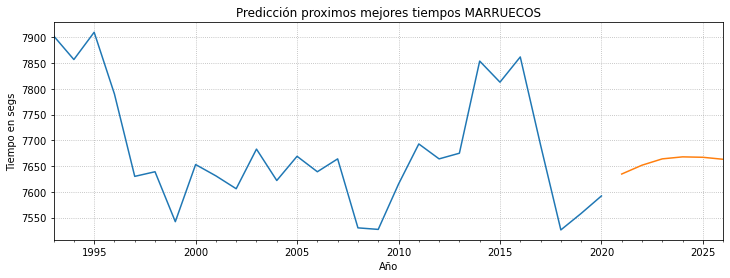

In [747]:
mar(men_best_time_per_year_mar, AutoReg, "TimeSec")

In [342]:
# Creamos una tabla con los mejores tiempos de cada año
best_times_each_year = df_top_7000_men[0:0]
for year_of_the_race in df_top_7000_men["Year of the race"].sort_values().unique():
    dataset_of_year = df_top_7000_men[df_top_7000_men["Year of the race"] == year_of_the_race]
    best_time_row_each_year = dataset_of_year[dataset_of_year["TimeSec"]== dataset_of_year.TimeSec.min()]
    best_time_row_each_year = best_times_each_year.append(best_time_each_for_year)

best_times_each_year

,Mark,Competitor,DOB,Nat,Pos,Venue,Date,Age at race,Current age,Year of the race,TimeSec
Rank,,,,,,,,,,,
7028,2:12:00,Morio SHIGEMATU,1940-06-21,JPN,1,Tyswik (JPN),1965-06-12,24,80,1965,7920.0
2624,2:09:37,Derek CLAYTON,1942-11-17,AUS,1,Fukuoka (JPN),1967-12-03,25,78,1967,7777.0
4436,2:10:48,Bill ADCOCKS,1941-11-11,GBR,1,Fukuoka (JPN),1968-12-08,27,79,1968,7848.0
1498,2:08:34,Derek CLAYTON,1942-11-17,AUS,1,Antwerpen (BEL),1969-05-30,26,78,1969,7714.0
2448,2:09:28,Ron HILL,1939-09-25,GBR,1,Edinburgh (GBR),1970-07-23,30,81,1970,7768.0
3902,2:10:30,Frank SHORTER,1947-10-31,USA,1,Fukuoka (JPN),1972-12-03,25,73,1972,7830.0
5255,2:11:13,John FARRINGTON,1942-07-02,AUS,1,Budapest (HUN),1973-07-14,31,78,1973,7873.0
2143,2:09:12,Ian THOMPSON,1949-10-16,GBR,1,Christchurch (NZL),1974-01-31,24,71,1974,7752.0
3351,2:10:09,Jerome DRAYTON,1945-01-10,CAN,1,Fukuoka (JPN),1975-12-07,30,75,1975,7809.0


In [345]:
# Edad del competidor que ha logrado la mejor marca anual, para intentar predecir con qué edades se batiran 
# las mejores marcas anuales en los proximos años.

best_times_each_year_filtered = best_times_each_year[["Year of the race","Age at race","TimeSec"]]
best_times_each_year_filtered


,Year of the race,Age at race,TimeSec
Rank,,,
7028,1965,24,7920.0
2624,1967,25,7777.0
4436,1968,27,7848.0
1498,1969,26,7714.0
2448,1970,30,7768.0
3902,1972,25,7830.0
5255,1973,31,7873.0
2143,1974,24,7752.0
3351,1975,30,7809.0


In [346]:
# Faltan algunos registros previos a 1972, por lo que procedemos a eliminarlos y analizar desde 1972 en adelante.

best_times_each_year_filtered = best_times_each_year_filtered.iloc[5:].reset_index(drop=True)
best_times_each_year_filtered

,Year of the race,Age at race,TimeSec
0,1972,25,7830.0
1,1973,31,7873.0
2,1974,24,7752.0
3,1975,30,7809.0
4,1976,25,7795.0
5,1977,25,7917.0
6,1978,25,7746.0
7,1979,31,7767.0
8,1980,24,7741.0
9,1981,24,7698.0


In [482]:

top_5_times_mean_each_years= df_top_7000_men.groupby("Year of the race").head(5)
top_5_times_mean_each_years=top_5_times_mean_each_years.groupby("Year of the race").mean()

In [483]:
top_5_times_mean_each_years = top_5_times_mean_each_years.iloc[5:]
top_5_times_mean_each_years.head()

,Age at race,Current age,TimeSec
Year of the race,,,
1972,26.00,74.00,7861.00
1973,31.00,78.00,7873.00
1974,32.50,79.50,7815.50
1975,27.75,72.75,7855.25
1976,27.00,71.40,7840.00


In [484]:
top_5_times_mean_each_years.index = pd.to_datetime(top_5_times_mean_each_years.index, format= "%Y")


In [644]:
def train_and_predict_top_5_avg_age_per_year_model(dataset_name,model_name, column):
    
                     ##COMPARAR LA MEDIA DE EDADES DE LOS ULTIMOS 5 AÑOS EXISTENTES VS PREDICCION:

    train = dataset_name.iloc[:-5] # todos excepto los ultimos 5 datos del dataset seran nuestro train.
    test = dataset_name.iloc[-5:] # los ultimos 5 datos del dataset seran nuestro test
    
    #IMPORTANTE, LA COLUMNA QUE QUEREMOS ENTRENAR Y PREDECIR DEBE SER SIEMPRE LA SEGUNDA COLUMNA DEL DATASET. LA PRIMERA SIEMPRE SERÁ "YEAR OF THE RACE".
    if model_name==AutoReg:
        model=model_name(train[column],lags=12) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    else:
        model=model_name(train[column],order=(2,0,1)) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    predictions = model.predict(len(dataset_name[column])-5, len(dataset_name[column])-1)
    print(pd.DataFrame({'observed':dataset_name[column][-5:], 'predicted':predictions}))
    
    rmse=sqrt(mean_squared_error(predictions,test[column]))
    print("RMSE: ",rmse)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    predictions.plot()
    plt.grid(linestyle="dotted");
    plt.title("Media de edad de los 5 mejores tiempos de cada año");
    plt.ylabel('Media edad');
    plt.xlabel('Año');
                     ##PREDECIR LA MEDIA DE EDADES DE LOS PROXIMOS 5 AÑOS:
    
    future_predictions = model.predict(len(dataset_name[column]), len(dataset_name[column])+5)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    future_predictions.plot()
    plt.grid(linestyle="dotted");
    plt.title("Predicción media de edad de los 5 mejores tiempos de cada año");
    plt.ylabel('Media edad');
    plt.xlabel('Año');

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


            observed  predicted
2016-01-01      30.4  27.243890
2017-01-01      29.2  27.166845
2018-01-01      27.8  27.318172
2019-01-01      29.6  27.480531
2020-01-01      28.4  27.562758
RMSE:  1.9758558126328825


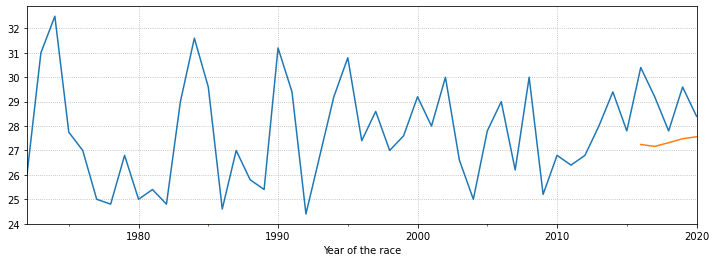

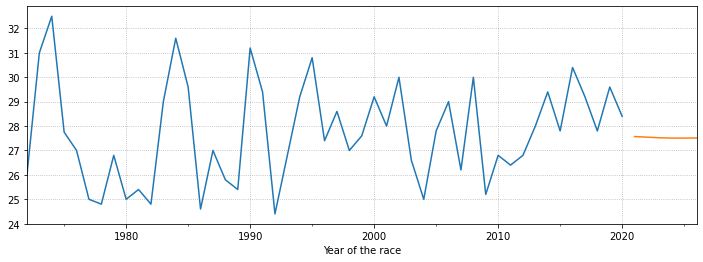

In [486]:
train_and_predict_top_5_avg_age_per_year_model(top_5_times_mean_each_years, ARIMA, "Age at race")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: Convergence

            observed  predicted
2016-01-01      30.4  27.622766
2017-01-01      29.2  27.580745
2018-01-01      27.8  27.570778
2019-01-01      29.6  27.568410
2020-01-01      28.4  27.567844
RMSE:  1.7439839777557173


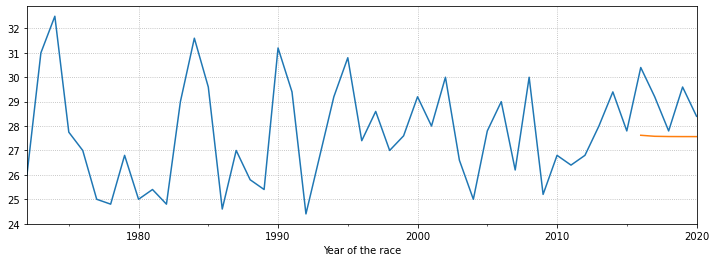

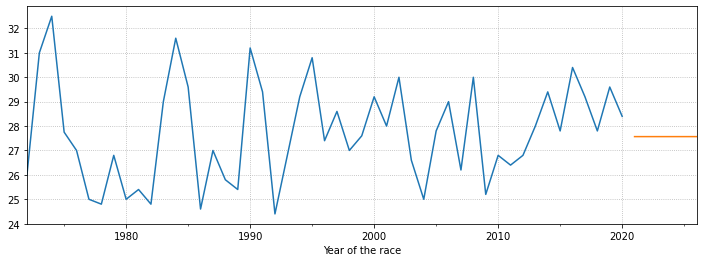

In [487]:
train_and_predict_top_5_avg_age_per_year_model(top_5_times_mean_each_years, SARIMAX, "Age at race")

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support exten

            observed  predicted
2016-01-01      30.4  27.678482
2017-01-01      29.2  27.296666
2018-01-01      27.8  26.938326
2019-01-01      29.6  28.429348
2020-01-01      28.4  27.515662
RMSE:  1.6687901619026049


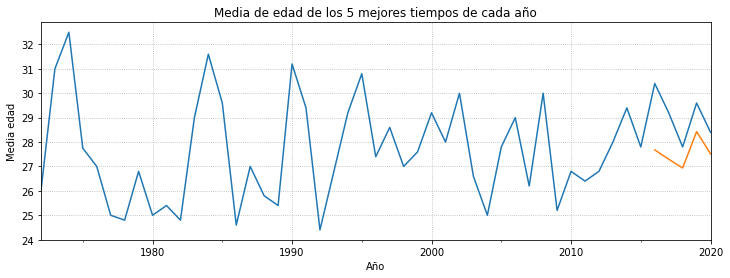

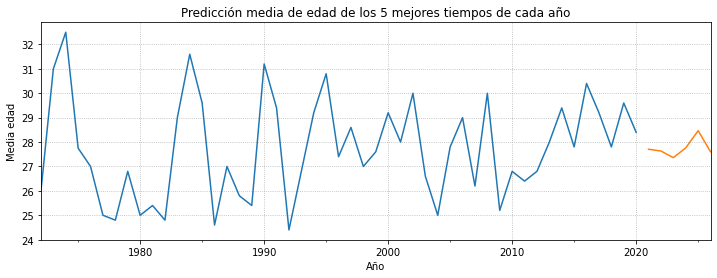

In [645]:
train_and_predict_top_5_avg_age_per_year_model(top_5_times_mean_each_years, AutoReg, "Age at race")

In [688]:
# Creamos una tabla con los mejores tiempos de cada año en la ciudad de Berlin
men_best_time_per_year_berlin = df_top_7000_men[df_top_7000_men["Venue"]== "Berlin (GER)"][["Year of the race","TimeSec"]].groupby(["Year of the race"],as_index=False).min()
men_best_time_per_year_berlin

,Year of the race,TimeSec
0,1985,7903.0
1,1986,7863.0
2,1987,7871.0
3,1988,7905.0
4,1989,7811.0
5,1990,7696.0
6,1991,7857.0
7,1992,7687.0
8,1993,7857.0
9,1994,7711.0


In [721]:
def berlin(dataset_name,model_name, column):
    
                     ##COMPARAR LOS MEJORES TIEMPOS DE LOS ULTIMOS 5 AÑOS EXISTENTES VS PREDICCION:
    first_year=dataset_name["Year of the race"][0]
    start_date=pd.to_datetime(first_year, format= "%Y")
    dataset_name["Year"] = pd.date_range(start=start_date, periods=dataset_name.shape[0], freq='A') # necesitamos crear un indice del dataset en funcion de los años de los que tenemos registros (desde 1972)
    dataset_name.index = dataset_name["Year"] 

    train = dataset_name.iloc[:-5] # todos excepto los ultimos 5 datos del dataset seran nuestro train.
    test = dataset_name.iloc[-5:] # los ultimos 5 datos del dataset seran nuestro test
    
    #IMPORTANTE, LA COLUMNA QUE QUEREMOS ENTRENAR Y PREDECIR DEBE SER SIEMPRE LA SEGUNDA COLUMNA DEL DATASET. LA PRIMERA SIEMPRE SERÁ "YEAR OF THE RACE".
    if model_name==AutoReg:
        model=model_name(train[column],lags=12) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    else:
        model=model_name(train[column],order=(2,0,1)) # train.columns[1] entrena la segunda columna del dataset train, en este caso "Age at race"
        model=model.fit()
    
    predictions = model.predict(len(dataset_name[column])-5, len(dataset_name[column])-1)
    print(pd.DataFrame({'observed':dataset_name[column][-5:], 'predicted':predictions}))

    rmse=sqrt(mean_squared_error(predictions,test[column]))
    print("RMSE: ",rmse)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    predictions.plot()
    plt.grid(linestyle="dotted");
    plt.title("Mejor tiempo anual ciudad: Berlin. Comparativa datos reales vs datos predecidos. ")
    plt.ylabel("Tiempo (Segundos)")
    plt.xlabel("Año")

                     ##PREDECIR LA MEDIA DE EDADES DE LOS PROXIMOS 5 AÑOS:
    
    future_predictions = model.predict(len(dataset_name[column]), len(dataset_name[column])+5)

    plt.figure(figsize=(12,4))
    dataset_name[column].plot()
    future_predictions.plot()
    plt.grid(linestyle="dotted");
    plt.title("Prediccion mejor tiempo anual ciudad: Berlin")
    plt.ylabel("Tiempo (Segundos)")
    plt.xlabel("Año")


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extend

            observed    predicted
2015-12-31    7440.0  7389.213715
2016-12-31    7383.0  7378.284288
2017-12-31    7412.0  7377.574714
2018-12-31    7299.0  7316.998211
2019-12-31    7301.0  7288.271305
RMSE:  29.231969668645277


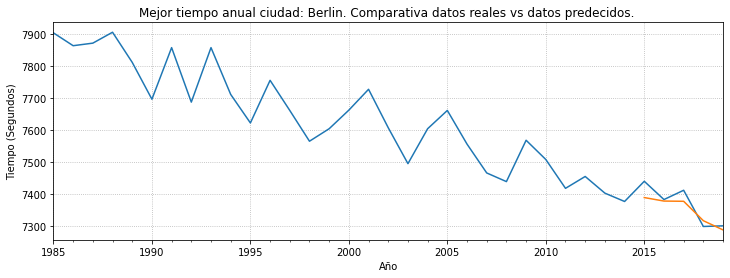

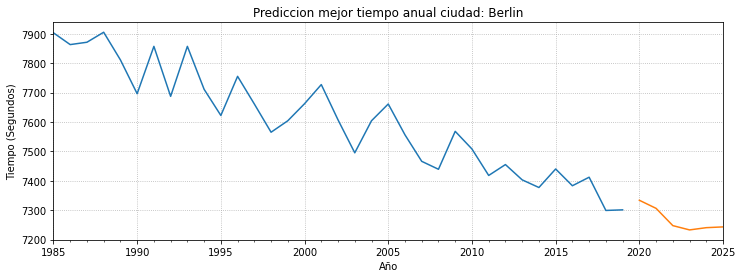

In [722]:
berlin(men_best_time_per_year_berlin, AutoReg, "TimeSec" )

In [769]:
df_top_7000_men = pd.read_csv("./output/data_7100_top_men_cleaned.csv", index_col="Rank")
df_top_7000_men.head(10)

,Mark,Competitor,DOB,Nat,Pos,Venue,Date,Age at race,Current age,Year of the race,TimeSec
Rank,,,,,,,,,,,
0,2:01:39,Eliud KIPCHOGE,1984-11-05,KEN,1,Berlin (GER),2018-09-16,33,36,2018,7299.0
1,2:01:41,Kenenisa BEKELE,1982-06-13,ETH,1,Berlin (GER),2019-09-29,37,38,2019,7301.0
2,2:02:37,Eliud KIPCHOGE,1984-11-05,KEN,1,London (GBR),2019-04-28,34,36,2019,7357.0
3,2:02:48,Birhanu LEGESE,1994-09-11,ETH,2,Berlin (GER),2019-09-29,25,26,2019,7368.0
4,2:02:55,Mosinet GEREMEW,1992-02-12,ETH,2,London (GBR),2019-04-28,27,28,2019,7375.0
5,2:02:57,Dennis KIMETTO,1984-04-22,KEN,1,Berlin (GER),2014-09-28,30,36,2014,7377.0
6,2:03:00,Evans CHEBET,1988-11-10,KEN,1,Valencia (ESP),2020-12-06,32,32,2020,7380.0
7,2:03:03,Kenenisa BEKELE,1982-06-13,ETH,1,Berlin (GER),2016-09-25,34,38,2016,7383.0
8,2:03:04,Lawrence CHERONO,1988-08-07,KEN,2,Valencia (ESP),2020-12-06,32,32,2020,7384.0


In [768]:
posibles_candidatos=df_top_7000_men[((df_top_7000_men['Nat']=='KEN') | (df_top_7000_men['Nat']=='ETH')) &
                    (df_top_7000_men['Current age']>=22) &
                    (df_top_7000_men['Current age']<=26) &                                  
                    (df_top_7000_men['TimeSec']-69 <= 7299)]

posibles_candidatos


,Mark,Competitor,DOB,Nat,Pos,Venue,Date,Age at race,Current age,Year of the race,TimeSec
Rank,,,,,,,,,,,
3,2:02:48,Birhanu LEGESE,1994-09-11,ETH,2,Berlin (GER),2019-09-29,25,26,2019,7368.0
